In [7]:
import pandas as pd
import numpy as np

## Dates and Times in Python

#### Native Python Dates and Times: datetime and dateutil

- manually build a date using the datetime type:

In [1]:
from datetime import datetime
datetime(year = 2015, month = 7 , day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

- using the dateutil module, you can parse dates from a variety of string formats:

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
date.strftime('%A')

'Saturday'

##### python documentation of python strftime
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
##### Python Datetime documentation
- https://docs.python.org/3/library/datetime.html
##### Python Dateutil's documentation
- http://labix.org/python-dateutil

#### Typed arrays of times: Numpy's datetime64

In [8]:
date = np.array("2015-07-04", dtype = np.datetime64 )
date

array('2015-07-04', dtype='datetime64[D]')

In [9]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [10]:
#Numpy's day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [11]:
#Numpy's minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

- the time is automatically set to the local time on the computer executing the code

In [12]:
#User can force any desired fundamental unit using one of many format codes
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

#### Numpy's Datetime64 documentation
- https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

##### Note:
- in the real world, a useful default is datetime64[ns] , as it can encode a useful range of modern dates with a suitably fine precision.

## Dates and times in Pandas: Best of both worlds

Parse a flexibly formatted string date, and use format codes to output the day of the week in pandas

In [16]:
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [14]:
date.strftime('%A')

'Saturday'

NumPy-style vectorized operations directly on this same object

In [17]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

Constructing the series with time-indexed data

In [21]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [22]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

special date-only indexing operations, such as passing a year to obtain a slice of all data from that year

In [23]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

- For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python’s native datetime , but is based on the more efficient numpy.datetime64 data type. The associated index structure is DatetimeIndex.
- For time periods, Pandas provides the Period type. This encodes a fixedfrequency interval based on numpy.datetime64 . The associated index structure is PeriodIndex .
- For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python’s native datetime.timedelta type, and is based on numpy.timedelta64 . The associated index structure is TimedeltaIndex .

Passing a single date to pd.to_datetime() yields a Timestamp ; passing a series of dates by default yields a DatetimeIndex

In [25]:
date = pd.to_datetime([datetime(2015, 7, 3), '4th of July 2015', '2015,July 6', '07-07-2015', '20150708'])
date

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we’ll use 'D' to indicate daily frequency.

In [26]:
date.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A TimedeltaIndex is created, for example, when one date is subtracted from another

In [29]:
date - date[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()

- pd.date_range() for timestamps
- pd.period_range() for periods
- pd.timedelta_range() for time deltas

pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day.

In [30]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [32]:
#start , period, no end
pd.date_range('2015-07-03', periods=7)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09'],
              dtype='datetime64[ns]', freq='D')

You can modify the spacing by altering the freq argument, which defaults to D . For example, here we will construct a range of hourly timestamps:

In [35]:
pd.date_range('2015-07-03', periods = 8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of period or time delta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful. Here are some monthly periods:

In [36]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

And a sequence of durations increasing by an hour:

In [37]:
pd.timedelta_range(0, periods=8, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

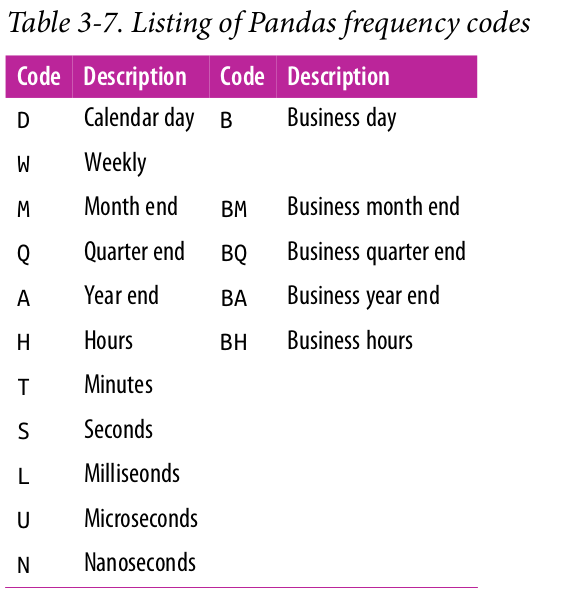

In [48]:
from IPython.display import Image
Image(filename = "data/pandas_frequency_codes.png", width = 350, height = 250)

Adding an S suffix to any of these marks it instead at the beginning

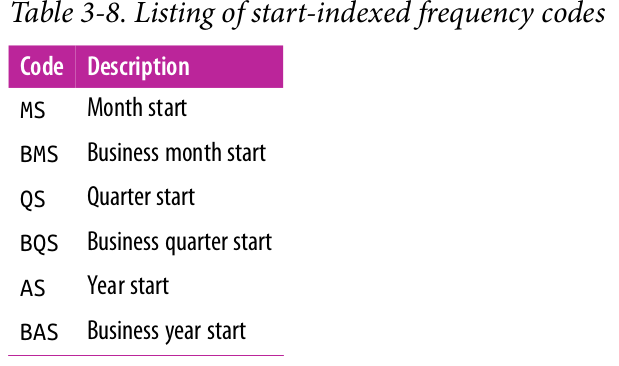

In [51]:
Image(filename='data/start-indexed_frequency_codes.png', width = 350, height = 300)

You can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- Q-JAN , BQ-FEB , QS-MAR , BQS-APR , etc.
- A-JAN , BA-FEB , AS-MAR , BAS-APR , etc.

you can modify the split-point of the weekly frequency by adding a three-letter weekday code

- W-SUN , W-MON , W-TUE , W-WED , etc.

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour ( H ) and minute ( T ) codes as follows:

In [53]:
pd.timedelta_range(0, periods=8, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00'],
               dtype='timedelta64[ns]', freq='150T')

- Business-Day offset

In [58]:
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=8, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, Windowing

- pandas-datareader package is used to import financial data from a number of available sources, including Yahoo finance,Google,Finance, and others.

In [72]:
from pandas_datareader import data

goog = data.DataReader('GOOG', data_source='google',start='2014', end='2016')

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues
